In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
import seaborn as sns
from datasets import load_dataset

In [2]:
# load data
datasets = load_dataset('lukebarousse/data_jobs')
df = datasets['train'].to_pandas()

# clean data
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda val: ast.literal_eval(val) if pd.notna(val) else val)


In [ ]:
# filter data for job in indonesia
df_ID = df[df['job_country']=='Indonesia'].copy()
df_ID

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
643,Data Scientist,Data Scientist,"Bali, Indonesia",via HR Software For Growing Businesses | Fresh...,Full-time,False,Indonesia,2023-07-03 13:14:47,False,False,Indonesia,None,NaN,NaN,Tyrads PTE. LTD.,"[python, r, aws, gcp, azure, spark, hadoop, ta...","{'analyst_tools': ['tableau', 'power bi'], 'cl..."
1213,Data Scientist,Data Scientist,Indonesia,via Linkedin,Full-time,False,Indonesia,2023-04-17 13:19:59,False,False,Indonesia,None,NaN,NaN,Robert Walters,"[python, sql]","{'programming': ['python', 'sql']}"
1244,Data Engineer,Data Engineer,"Jakarta, Indonesia",via LinkedIn,Full-time,False,Indonesia,2023-08-31 13:44:04,True,False,Indonesia,None,NaN,NaN,JULO,"[sql, java, python, postgresql, redshift, aws,...","{'cloud': ['redshift', 'aws', 'gcp', 'azure'],..."
1858,Data Engineer,Data Engineer - ETL Developer,"Jakarta, Indonesia",via LinkedIn,Contractor,False,Indonesia,2023-05-29 13:14:42,False,False,Indonesia,None,NaN,NaN,PT. IDStar Cipta Teknologi (IDstar),"[sql, oracle, spark, kafka]","{'cloud': ['oracle'], 'libraries': ['spark', '..."
2048,Senior Data Scientist,Senior Data Scientist,Indonesia,via LinkedIn,Full-time,False,Indonesia,2023-05-25 13:32:17,False,False,Indonesia,None,NaN,NaN,Robert Walters,"[sql, python]","{'programming': ['sql', 'python']}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785194,Data Analyst,Data Analyst,Indonesia,via Lokersby.id,Full-time,False,Indonesia,2023-07-22 06:46:40,False,False,Indonesia,None,NaN,NaN,PT Istana Mobil Surabaya Indah,None,None
785201,Data Scientist,Data Scientist,"Jakarta, Indonesia",via Trabajo.org,Full-time,False,Indonesia,2023-11-16 06:25:17,False,False,Indonesia,None,NaN,NaN,Great Giant Foods (GGF),"[r, sql, python, scala, java, c++, hadoop, tab...","{'analyst_tools': ['tableau'], 'libraries': ['..."
785271,Data Analyst,Data Analyst,"Jakarta, Indonesia",via Trabajo.org,Full-time,False,Indonesia,2023-11-25 06:23:43,True,False,Indonesia,None,NaN,NaN,Everwhite Indonesia,None,None
785312,Machine Learning Engineer,Machine Learning Engineer,"Jakarta, Indonesia",via Trabajo.org,Full-time,False,Indonesia,2023-11-25 06:23:43,False,False,Indonesia,None,NaN,NaN,Aliz,"[python, sql, gcp, bigquery, airflow, pandas, ...","{'cloud': ['gcp', 'bigquery'], 'libraries': ['..."


In [10]:
# find the top 3 most populer data role in indonesia
top_3_data_roles = df_ID.groupby('job_title_short').size().sort_values(ascending=False).head(3).index
top_3_data_roles

Index(['Data Engineer', 'Data Scientist', 'Data Analyst'], dtype='object', name='job_title_short')

C:\Users\crist\AppData\Local\Temp\ipykernel_9940\3198632694.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_yticklabels(new_labels, fontsize=12)
C:\Users\crist\AppData\Local\Temp\ipykernel_9940\3198632694.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_yticklabels(new_labels, fontsize=12)
C:\Users\crist\AppData\Local\Temp\ipykernel_9940\3198632694.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_yticklabels(new_labels, fontsize=12)


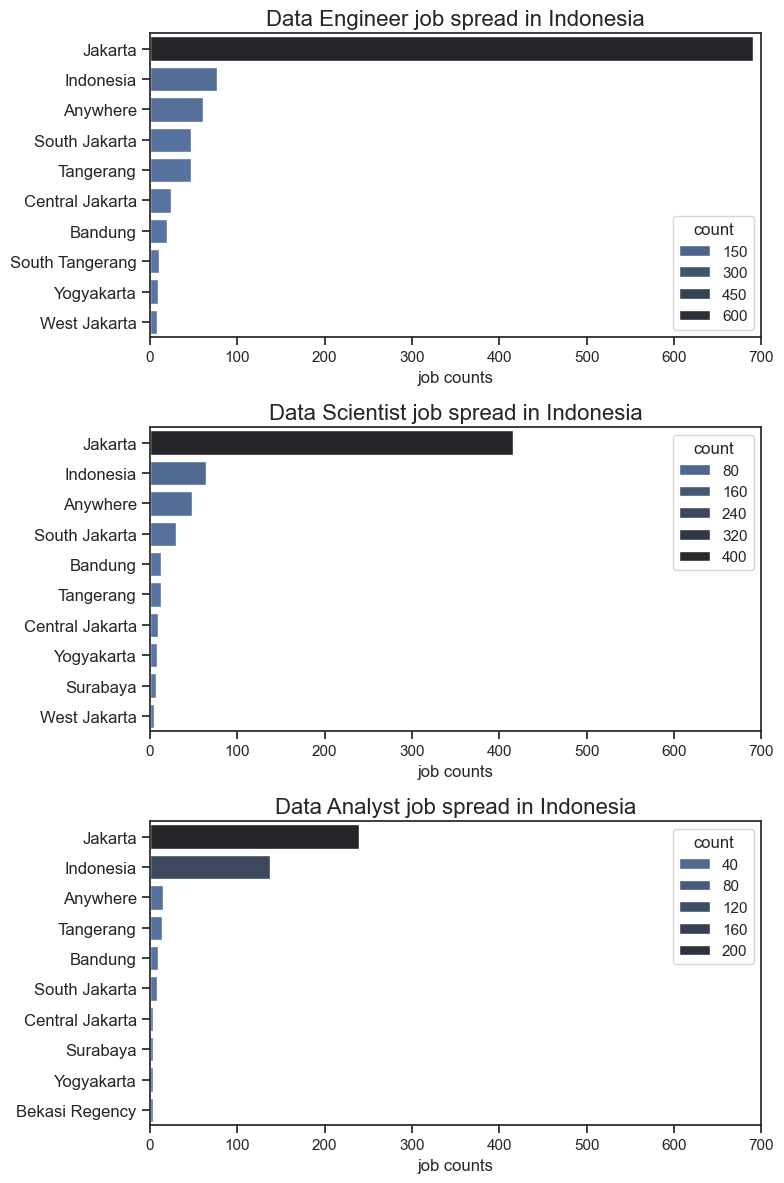

In [59]:
# for top 3 data roles, we can do EDA on the job_location 
fig,ax = plt.subplots(3,1)

sns.set_theme(style='ticks')
for i, item in enumerate(top_3_data_roles):
    df_plot = (df_ID[df_ID['job_title_short'] == item]['job_location'].value_counts().sort_values(ascending=False).head(10).to_frame())
    sns.barplot(data=df_plot, x='count', y='job_location', ax=ax[i], hue='count', palette='dark:b_r')
    ax[i].set_title(f'{item} job spread in Indonesia', fontsize=16)
    # set labels
    current_labels = [tick.get_text() for tick in ax[i].get_yticklabels()]
    new_labels = [','.join(label.split(',')[:1]) for label in current_labels]
    ax[i].set_yticklabels(new_labels, fontsize=12)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('job counts')
    ax[i].set_xlim(0, 700)
    

fig.set_figheight(12)
fig.set_figwidth(8)
fig.tight_layout()






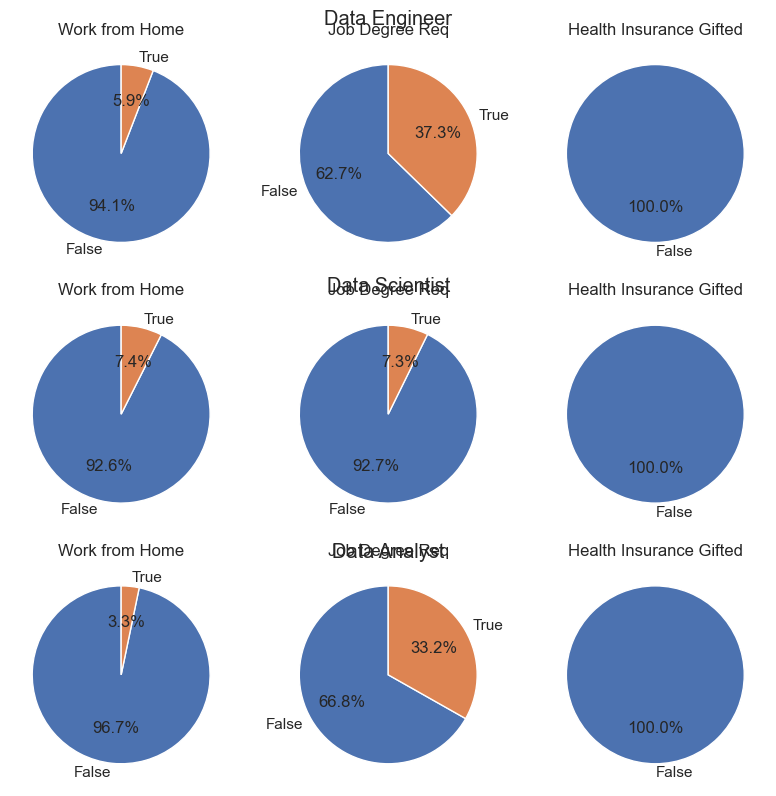

In [ ]:
fig, ax = plt.subplots(3,3)


dict_column = {
    'job_work_from_home': 'Work from Home',
    'job_no_degree_mention': 'Job Degree Req',
    'job_health_insurance': 'Health Insurance Gifted'
}

subfigs = fig.subfigures(3,1)

for i, item in enumerate(subfigs):
    job_title = top_3_data_roles[i]
    df_plot = df_ID[df_ID['job_title_short'] == job_title]
    item.suptitle(f'{job_title} Work Conditions')

    for j, (column, title) in enumerate(dict_column.items()):
        counts = df_plot[column].value_counts()
        labels = counts.sort_values(ascending=False).head().index
        ax[i][j].pie(counts, startangle=90, autopct='%.1f%%', labels=labels)
        ax[i][j].set_title(title)

fig.set_figheight(8)
fig.set_figwidth(8)
fig.tight_layout()

# http://stackoverflow.com/questions/55289669/add-margin-to-a-subplot-in-matplotlib